<a href="https://colab.research.google.com/github/tariqzia5/ML_Twitter-Climate-Change-Sentiment/blob/main/1_NLP_Data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[statinfer.com](https://statinfer.com/)

# Packages Installation

In [2]:
#!pip install nltk
#!pip install spacy

In [3]:
import pandas as pd
import nltk
import spacy
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# Data Importing

In [5]:
twitter_data=pd.read_csv("https://raw.githubusercontent.com/tariqzia5/ML_Twitter-Climate-Change-Sentiment/main/twitter_sentiment_data.csv")
twitter_data.sample(10)

,sentiment_level,raw_tweet,tweet_ID
37425,2,RT @Severe_WXAlerts: Climate Change Impacts to...,6.185360e+17
36201,0,@Redsfan1977 @h8kes @Arron_banks @JuliaHB1 Sor...,9.603750e+17
33677,1,Let us think about what we can do to mitigate ...,9.542240e+17
27329,2,RT @CNN: Canadian PM Justin Trudeau offers a r...,9.110630e+17
30869,1,Go with the flow: Using nature to help fight c...,9.555030e+17
16683,0,RT @MuslimIQ: Reports indicate these Ahmadi Mu...,8.439090e+17
36419,1,RT @adamvaughan_uk: The lack of women in energ...,9.618750e+17
1855,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,7.953540e+17
13511,0,RT @Crudes: if global warming isn't real then ...,8.341010e+17
32771,1,RT @BV: U.S. security strategy completely igno...,9.533460e+17


#Lower Case conversion

In [6]:
twitter_data["tweet_lowcase"]=twitter_data["raw_tweet"].apply(lambda x:str(x).lower())
twitter_data.sample(10)

,sentiment_level,raw_tweet,tweet_ID,tweet_lowcase
30978,0,RT @2CynicAl65: This is called a 'dusting'. \n...,9.558870e+17,rt @2cynical65: this is called a 'dusting'. \n...
40954,1,RT @elliegoulding: Beautiful speech by @LeoDiC...,7.042880e+17,rt @elliegoulding: beautiful speech by @leodic...
1701,0,The 'skeptical environmentalist' takes on clim...,7.950530e+17,the 'skeptical environmentalist' takes on clim...
40425,1,RT @guyshrubsole: Govt accept need to update c...,6.880550e+17,rt @guyshrubsole: govt accept need to update c...
29911,1,@Climatearticles You cannot stop climate change.,9.521850e+17,@climatearticles you cannot stop climate change.
26637,1,RT @stopthenutjob: Largest evac in history\nRe...,9.068570e+17,rt @stopthenutjob: largest evac in history\nre...
16808,2,US budget broadside on climate change https://...,8.441370e+17,us budget broadside on climate change https://...
20825,1,RT @painhub: im gonna just ignore the fact tha...,8.614300e+17,rt @painhub: im gonna just ignore the fact tha...
3068,1,Just to get this straight: everyone understand...,7.965670e+17,just to get this straight: everyone understand...
31078,1,Can we stop climate change by removing CO2 fro...,9.564360e+17,can we stop climate change by removing co2 fro...


#Tokenizing

In [7]:
from nltk.tokenize import word_tokenize 
twitter_data["word_tokens"] = twitter_data["tweet_lowcase"].apply(lambda x:word_tokenize(str(x)))
#lambda function to apply on all rows
#str() function to avoid numeric and other errors
twitter_data[["raw_tweet","word_tokens"]].sample(10)

,raw_tweet,word_tokens
43883,trump$q$s defiance of climate change cd cause ...,"[trump, $, q, $, s, defiance, of, climate, cha..."
21252,RT @sciam: A new study has found a steady grow...,"[rt, @, sciam, :, a, new, study, has, found, a..."
29725,#AirPollution #EnvironmentalNews Freezing your...,"[#, airpollution, #, environmentalnews, freezi..."
27064,RT @tedlieu: #SaturdayMorning thought. @FLGovS...,"[rt, @, tedlieu, :, #, saturdaymorning, though..."
9525,"RT @saul42: Finally, Paris climate change agre...","[rt, @, saul42, :, finally, ,, paris, climate,..."
37196,RT @FrMatthewLC: Par. 14 of Laudato Si speaks ...,"[rt, @, frmatthewlc, :, par, ., 14, of, laudat..."
31345,Hindu Kush Himalayas: joining forces to combat...,"[hindu, kush, himalayas, :, joining, forces, t..."
9643,Retweeted Climate Central (@ClimateCentral):\n...,"[retweeted, climate, central, (, @, climatecen..."
41016,RT @thinkprogress: Climate deniers’ favorite t...,"[rt, @, thinkprogress, :, climate, deniers, ’,..."
26854,RT @ClimateCentral: Here are three ways nanoma...,"[rt, @, climatecentral, :, here, are, three, w..."


In [8]:
twitter_data[["raw_tweet","word_tokens"]].sample(10)

,raw_tweet,word_tokens
41980,RT @setiarashmi: #MSGMentor4Life we should gro...,"[rt, @, setiarashmi, :, #, msgmentor4life, we,..."
42764,RT @AndynolanEJ: My latest piece for @envjourn...,"[rt, @, andynolanej, :, my, latest, piece, for..."
25818,RT @JooBilly: And if #Houston isn't secure fro...,"[rt, @, joobilly, :, and, if, #, houston, is, ..."
35198,Rent control policy is for the left what clima...,"[rent, control, policy, is, for, the, left, wh..."
23400,RT @SteveSGoddard: Historians will look back a...,"[rt, @, stevesgoddard, :, historians, will, lo..."
41953,#ItsOfficiallySummerWhen It$q$s hotter than gl...,"[#, itsofficiallysummerwhen, it, $, q, $, s, h..."
4438,"RT @AssaadRazzouk: In the new new world, China...","[rt, @, assaadrazzouk, :, in, the, new, new, w..."
38750,RT @AZPatriot01: $q$If I Only Had a Brain!$q$ ...,"[rt, @, azpatriot01, :, $, q, $, if, i, only, ..."
19571,RT @SteveNash: Toby is the best center back in...,"[rt, @, stevenash, :, toby, is, the, best, cen..."
10943,RT @POTUS: The science couldn't be clearer - w...,"[rt, @, potus, :, the, science, could, n't, be..."


# Expanding shortforms

In [9]:
contra_Expan_Dict = {"ain`t": "am not","aren`t": "are not","can`t": "cannot","can`t`ve": "cannot have","`cause": "because",
"could`ve": "could have","couldn`t": "could not","couldn`t`ve": "could not have","didn`t": "did not",
"doesn`t": "does not","don`t": "do not","hadn`t": "had not","hadn`t`ve": "had not have","hasn`t": "has not",
"haven`t": "have not","he`d": "he would","he`d`ve": "he would have","he`ll": "he will","he`ll`ve": "he will have",
"he`s": "he is","how`d": "how did","how`d`y": "how do you","how`ll": "how will",
"how`s": "how does","i`d": "i would","i`d`ve": "i would have","i`ll": "i will","i`ll`ve": "i will have","i`m": "i am",
"i`ve": "i have","isn`t": "is not","it`d": "it would","it`d`ve": "it would have","it`ll": "it will","it`ll`ve": "it will have",
"it`s": "it is","let`s": "let us","ma`am": "madam","mayn`t": "may not","might`ve": "might have","mightn`t": "might not",
"mightn`t`ve": "might not have","must`ve": "must have","mustn`t": "must not","mustn`t`ve": "must not have","needn`t": "need not","needn`t`ve": "need not have",
"o`clock": "of the clock","oughtn`t": "ought not","oughtn`t`ve": "ought not have","shan`t": "shall not",
"sha`n`t": "shall not","shan`t`ve": "shall not have","she`d": "she would",
"she`d`ve": "she would have","she`ll": "she will","she`ll`ve": "she will have",
"she`s": "she is","should`ve": "should have","shouldn`t": "should not","shouldn`t`ve": "should not have","so`ve": "so have","so`s": "so is",
"that`d": "that would","that`d`ve": "that would have","that`s": "that is","there`d": "there would","there`d`ve": "there would have","there`s": "there is",
"they`d": "they would","they`d`ve": "they would have","they`ll": "they will","they`ll`ve": "they will have","they`re": "they are","they`ve": "they have",
"to`ve": "to have","wasn`t": "was not"," u ": " you "," ur ": " your "," n ": " and ","won`t": "would not",
"dis": "this","bak": "back","brng": "bring"}

In [10]:
def expanded_form(x):
  if x in contra_Expan_Dict.keys():
    return(contra_Expan_Dict[x])
  else:
    return(x)

In [11]:
x=str(twitter_data["tweet_lowcase"][6207])
print("original tweet ==>", x)
x=x.split()
print("Expanded form ==>",[expanded_form(t) for t in x])

original tweet ==> rt @cnn: no snow where there should be. bleached anemones. cracks in the ice. this is what climate change looks like:ã¢â‚¬â¦
Expanded form ==> ['rt', '@cnn:', 'no', 'snow', 'where', 'there', 'should', 'be.', 'bleached', 'anemones.', 'cracks', 'in', 'the', 'ice.', 'this', 'is', 'what', 'climate', 'change', 'looks', 'like:ã¢â‚¬â¦']


In [12]:
twitter_data["tweet_expanded"]=twitter_data["tweet_lowcase"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
twitter_data[["raw_tweet","tweet_expanded"]].sample(10)

,raw_tweet,tweet_expanded
15619,RT @TheDailyShow: .@jordanklepper finds out ho...,"[rt, @thedailyshow:, .@jordanklepper, finds, o..."
19440,Polar bears will struggle to survive if climat...,"[polar, bears, will, struggle, to, survive, if..."
24782,RT @ClimateCentral: Corn could be major victim...,"[rt, @climatecentral:, corn, could, be, major,..."
34923,RT @nit_set: The not so rosy #EconomicSurvey18...,"[rt, @nit_set:, the, not, so, rosy, #economics..."
11189,Holy moly this bitch thinks global warming is ...,"[holy, moly, this, bitch, thinks, global, warm..."
27761,RT @Earthjustice: 'If Trump wants to pretend t...,"[rt, @earthjustice:, 'if, trump, wants, to, pr..."
42321,RT @hautedamn: ISIS has already claimed respon...,"[rt, @hautedamn:, isis, has, already, claimed,..."
43029,RT @RavMABAY: I am SO DAMN sick hearing about ...,"[rt, @ravmabay:, i, am, so, damn, sick, hearin..."
1767,RT @guardian: Nicholas Stern: cost of global w...,"[rt, @guardian:, nicholas, stern:, cost, of, g..."
24239,RT @DanNerdCubed: The 'Is climate change real?...,"[rt, @dannerdcubed:, the, 'is, climate, change..."


In [13]:
twitter_data[["raw_tweet","tweet_expanded"]].sample(10)

,raw_tweet,tweet_expanded
18267,RT @MrBeastYT: If global warming doesn't exist...,"[rt, @mrbeastyt:, if, global, warming, doesn't..."
11064,If global warming helps remedy a bit of season...,"[if, global, warming, helps, remedy, a, bit, o..."
7118,RT @vicenews: Donald TrumpÃ¢â‚¬â„¢s unlikely c...,"[rt, @vicenews:, donald, trumpã¢â‚¬â„¢s, unlik..."
34618,Trump appears to misunderstand basic facts..cl...,"[trump, appears, to, misunderstand, basic, fac..."
33556,if boss baby getting nominated for an Oscar do...,"[if, boss, baby, getting, nominated, for, an, ..."
23485,How will global warming gain acceptance when t...,"[how, will, global, warming, gain, acceptance,..."
27012,RT @katya_zamo: Omg it was climate change that...,"[rt, @katya_zamo:, omg, it, was, climate, chan..."
15398,RT @Khanoisseur: Twitter helped a climate chan...,"[rt, @khanoisseur:, twitter, helped, a, climat..."
15172,RT @scifri: Here's how to talk about climate c...,"[rt, @scifri:, here's, how, to, talk, about, c..."
5916,RT @StephenSchlegel: she's thinking about how ...,"[rt, @stephenschlegel:, she's, thinking, about..."


# Stopwords Removal

## NLTK Stopwords

In [14]:
from nltk.corpus import stopwords 
nltk_stop_words = set(stopwords.words('english')) ##Selecting the stop words from the Language
print("Number of Stop words in NLTK ==>", len(nltk_stop_words))
print(sorted(nltk_stop_words))

Number of Stop words in NLTK ==> 179
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 

## spaCy Stopwords

In [15]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
print("Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))
#Spacy stopwords list looks better. 

Number of Stop words in spaCy ==> 326
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'ha

In [16]:
x=twitter_data["tweet_expanded"][16355]
print("original tweet ==>", x)
print("After Removing Stopwords ==>",[t for t in x if t not in spacy_stopwords])

original tweet ==> ['rt', '@kathleen_rest:', 'and', 'whie', 'house', 'says', 'federal', 'resources', 'on', 'climate', 'change', 'are', 'a', "'waste", 'of', "money.'", 'tell', 'that', 'to', 'these', 'communities.…']
After Removing Stopwords ==> ['rt', '@kathleen_rest:', 'whie', 'house', 'says', 'federal', 'resources', 'climate', 'change', "'waste", "money.'", 'tell', 'communities.…']


In [17]:
twitter_data["After_Removing_Stopwords"] = twitter_data["tweet_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data[["raw_tweet","After_Removing_Stopwords"]].sample(10)

,raw_tweet,After_Removing_Stopwords
22314,RT @BettyBowers: America: Where climate change...,"[rt, @bettybowers:, america:, climate, change,..."
5647,RT @PoliticKels: Don't worry about global warm...,"[rt, @politickels:, don't, worry, global, warm..."
22177,RT @paleblueeyes24: Q: Does President Trump be...,"[rt, @paleblueeyes24:, q:, president, trump, b..."
40034,RT @CommonBlackGirI: when ur enjoying the warm...,"[rt, @commonblackgiri:, ur, enjoying, warm, we..."
20149,RT @350: 'This is a huge stride for human civi...,"[rt, @350:, 'this, huge, stride, human, civili..."
42753,RT @AC_screenwriter: Climate change is here an...,"[rt, @ac_screenwriter:, climate, change, need,..."
12044,"If climate change is a myth, why all the effor...","[climate, change, myth,, effort, quash, discus..."
28348,Author and radio host suggests we've already l...,"[author, radio, host, suggests, we've, lost, c..."
31139,@josh_hammer Well we solved climate change it ...,"[@josh_hammer, solved, climate, change]"
30156,RT @AlexSteffen: 'In areas of political instab...,"[rt, @alexsteffen:, 'in, areas, political, ins..."


## Add Custom Stowords

In [18]:
from spacy.lang.en.stop_words import STOP_WORDS as spacy_stopwords
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
print("New Number of Stop words in spaCy ==>", len(spacy_stopwords))
print(sorted(spacy_stopwords))

New Number of Stop words in spaCy ==> 331
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'ha', 'had', 

In [19]:
twitter_data["After_Removing_Stopwords"] = twitter_data["tweet_expanded"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
twitter_data[["raw_tweet","After_Removing_Stopwords"]].sample(10)

,raw_tweet,After_Removing_Stopwords
29606,RT @RealSaavedra: Scientist and Weather Channe...,"[@realsaavedra:, scientist, weather, channel, ..."
17949,RT @LiberalResist: Another legal battle awaits...,"[@liberalresist:, legal, battle, awaits, trump..."
39228,How Global Warming AteThe NASA Budget https://...,"[global, warming, atethe, nasa, budget, https:..."
38483,Hillary is Obama in a dress. One Marxist is en...,"[hillary, obama, dress., marxist, enough., enl..."
32717,just a reminder that a woke miley cyrus at the...,"[reminder, woke, miley, cyrus, age, 16, talkin..."
37234,"RT Pope Francis Talks Climate Change, Shocks C...","[pope, francis, talks, climate, change,, shock..."
1167,RT @TammyGrubb: Obama raises climate change. Y...,"[@tammygrubb:, obama, raises, climate, change...."
41016,RT @thinkprogress: Climate deniers’ favorite t...,"[@thinkprogress:, climate, deniers’, favorite,..."
43707,Working on this in Episode 4 and 5. https://t....,"[working, episode, 4, 5., https://t.co/lwtsnoq..."
10607,Denying climate change is dangerous. Join the ...,"[denying, climate, change, dangerous., join, p..."


#Regular Expression

In [20]:
def clean_with_re(x):
  x=str(x)
  x=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'," ", x) #Remove URLs
  x=re.sub(r'[^\w ]+', "", x) # Remove Punctuation-1
  x=re.sub(r"[,!@&\'?\.$%_]"," ", x) # Remove Punctuation-2
  x=re.sub(r"\d+"," ", x) #Remove digits
  return(x)

In [21]:
import re
twitter_data["tweet_cleaned_Regex"]=twitter_data["After_Removing_Stopwords"].apply(lambda x:clean_with_re(x))
twitter_data[["raw_tweet","tweet_cleaned_Regex"]].sample(10)

,raw_tweet,tweet_cleaned_Regex
30177,"New York City sues Shell, ExxonMobil and other...",new york city sues shell exxonmobil oil compan...
15445,@seanhannity Embrace truth do you? then call o...,seanhannity embrace truth you trump climate ch...
9156,Alberta ice climber to go inside a glacier to ...,alberta ice climber inside glacier measure cli...
6422,RT @kurteichenwald: China is now explaining th...,kurteichenwald china explaining history climat...
22735,June 7th. Its 12 degrees outside. Fn climate c...,june th degrees outside fn climate change f...
10625,RT @RachelAzzara: @realDonaldTrump because you...,rachelazzara realdonaldtrump irresponsibly den...
42154,Google:Scotland meets climate change targets f...,googlescotland meets climate change targets ti...
6075,RT @StephenSchlegel: she's thinking about how ...,stephenschlegel shes thinking shes going die h...
35579,Can't wait for @realDonaldTrump to use Punxsut...,cant wait realdonaldtrump use punxsutawney phi...
3686,An idiot who thinks climate change is a hoax c...,idiot thinks climate change hoax created china...


In [22]:
twitter_data[["After_Removing_Stopwords","tweet_cleaned_Regex"]].sample(10)

,After_Removing_Stopwords,tweet_cleaned_Regex
4463,"[.@winnie_byanyima, changing, climate, change,...",winnie byanyima changing climate change hunger...
6329,"[@stephenschlegel:, she's, thinking, she's, go...",stephenschlegel shes thinking shes going die h...
26308,"[@unite4safe:, colorado, @nygovcuomo, pressure...",unite safe colorado nygovcuomo pressured stopc...
29102,"[global, warming, bot, exist., fabrication, mi...",global warming bot exist fabrication mind
32314,"[@odu:, @nsf, recently, granted, funds, old, d...",odu nsf recently granted funds old dominion un...
36883,"[@climategroup:, businesses, know, costs, igno...",climategroup businesses know costs ignore clim...
30025,"[worry,, trauma, catastrophe:, climate, change...",worry trauma catastrophe climate change effect...
10490,"[@risj_oxford:, ‘digital, media, shaking, repo...",risj oxford digital media shaking reporting cl...
16882,"[@grovernorquist, u, propose, climate, change?...",grovernorquist u propose climate change trump ...
2401,"[you're, literally, sorts, dumb, think, global...",youre literally sorts dumb think global warmin...


#Spelling Correction

In [23]:
#!pip install textblob
#!python textblob.download_corpora

In [24]:
from textblob import TextBlob
sample_tweet="What an grat and amazimg week. I am excited to learn data scienec"
corrected_tweet=TextBlob(sample_tweet).correct()
corrected_tweet

TextBlob("That an great and amazing week. I am excited to learn data science")

#Lemmatization

In [25]:
spacy_model = spacy.load('en_core_web_sm')

In [26]:
sample_tweet=twitter_data["tweet_cleaned_Regex"][0]
print("Original Text ==>", sample_tweet)
print("Lemmatization Results ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_tweet))]))
#print("Lemmatization PRON removed ==>", " ".join([t.lemma_ for t in spacy_model(str(sample_tweet)) if t.lemma_ !="-PRON-" ]))

Original Text ==> tiniebeany climate change interesting hustle global warming planet stopped warming   yes suv boom
Lemmatization Results ==> tiniebeany climate change interesting hustle global warming planet stop warm    yes suv boom


In [27]:
twitter_data["Lemmatized_tweet"] = twitter_data["tweet_cleaned_Regex"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
twitter_data[["raw_tweet","Lemmatized_tweet"]].sample(10)

,raw_tweet,Lemmatized_tweet
1897,RT @NatGeoChannel: Watch #BeforeTheFlood right...,natgeochannel watch beforetheflood right here ...
14027,@Gail_BeAN shout out to global warming lol,gail bean shout global warming
42015,@ChrisCuomo So you will promote HRC email stor...,chriscuomo promote hrc email story hold dt acc...
20548,@EPA @EPAScottPruitt @WashTimes Humans on the ...,epa epascottpruitt washtime human verge cause ...
8686,@JunkScience the fraud &amp; cult of 'climate ...,junkscience fraud amp cult climate change scar...
11488,"As Thatcher understood, Conservatives are not ...",thatcher understand conservative true climate ...
14569,"RT @AnjaKolibri: Degraded pastures, #desertifi...",anjakolibri degraded pasture desertification k...
35476,RT @TIME: The Pentagon warned that climate cha...,time pentagon warn climate change threaten hal...
29245,RT @BrightWaterSci: Not just heat: even our sp...,brightwatersci heat spring frost bear fingerpr...
1006,RT @mishacollins: Good point! @realdonaldtrump...,mishacollin good point realdonaldtrump candida...


In [28]:
#Few more samples
twitter_data[["raw_tweet","Lemmatized_tweet"]].sample(10)

,raw_tweet,Lemmatized_tweet
40985,A compelling video on the need to address clim...,compelling video address climate change d
3350,RT @AndyBengt: Vi ska inte glÃƒÂ¶mma vem som Ã...,andybengt vi ska inte glãƒâmma vem som ãƒâr vi...
28625,RT @WWF: Fighting climate change means protect...,wwf fighting climate change mean protect fores...
13664,RT @ClimateCentral: The EU’s renewable energy ...,climatecentral eus renewable energy policy mak...
31015,@MicaBurton I'm doing the same thing in 2 year...,micaburton i m thing year climate change ge...
37873,"RT @CelsiusGuru: Apple, Microsoft, Google and ...",celsiusguru apple microsoft google firm commit...
25003,RT @climatehawk1: Here's how #climate change i...,climatehawk here climate change make america...
29352,Trump omits key military priority from Nationa...,trump omit key military priority national secu...
10898,RT @SenSanders: While Mr. Trump and his cabine...,sensander mr trump cabinet nominee deny realit...
22574,RT @TheTruth24US: Why won't the White House te...,thetruth we will not white house tell trump th...


#Any Further Cleaning

In [29]:
spacy_stopwords.update({"would", "rt","like", "ha", "lol", "need", "do"})
twitter_data["Final_Cleaned_Tweet"] = twitter_data["Lemmatized_tweet"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
twitter_data["Final_Cleaned_Tweet_tokens"]=twitter_data["Final_Cleaned_Tweet"].apply(lambda x: " ".join(x) )
twitter_data[["raw_tweet","Final_Cleaned_Tweet_tokens"]].sample(10)

,raw_tweet,Final_Cleaned_Tweet_tokens
8685,"@FlowWithTheGo81 dont waste your time, climate...",flowwiththego waste time climate change hoax
22082,RT @UNICEF: Inaction is not an option. We need...,unicef inaction option act climate change fore...
15966,RT @VICE: Rex Tillerson allegedly used a fake ...,vice rex tillerson allegedly fake email exxon ...
33474,RT @CNBCTV18Live: LIVE #Davos2018 | PM @narend...,cnbctv live live davos pm narendramodi warn cl...
37279,RT @DennisvBerkel: BREAKING: Dutch Court decid...,dennisvberkel break dutch court decide netherl...
37753,RT @LLegardaNews: NEWS: Legarda Renews Call: P...,llegardanews news legarda renews phl understan...
30590,RT @gfery: What kind of emoji do you need to t...,gfery kind emoji talk climate change love plas...
5146,RT @PIX11News: 2016 'very likely' hottest year...,pix news likely hot year record world meteorol...
12042,When will people realize that nothing monument...,people realize monumental climate change chanc...
25705,RT @ClimateChangRR: Top climate change @rightr...,climatechangrr climate change rightrelevance i...


# Word Cloud

In [30]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
final_text="".join(twitter_data["Final_Cleaned_Tweet_tokens"])
len(final_text)

3193104

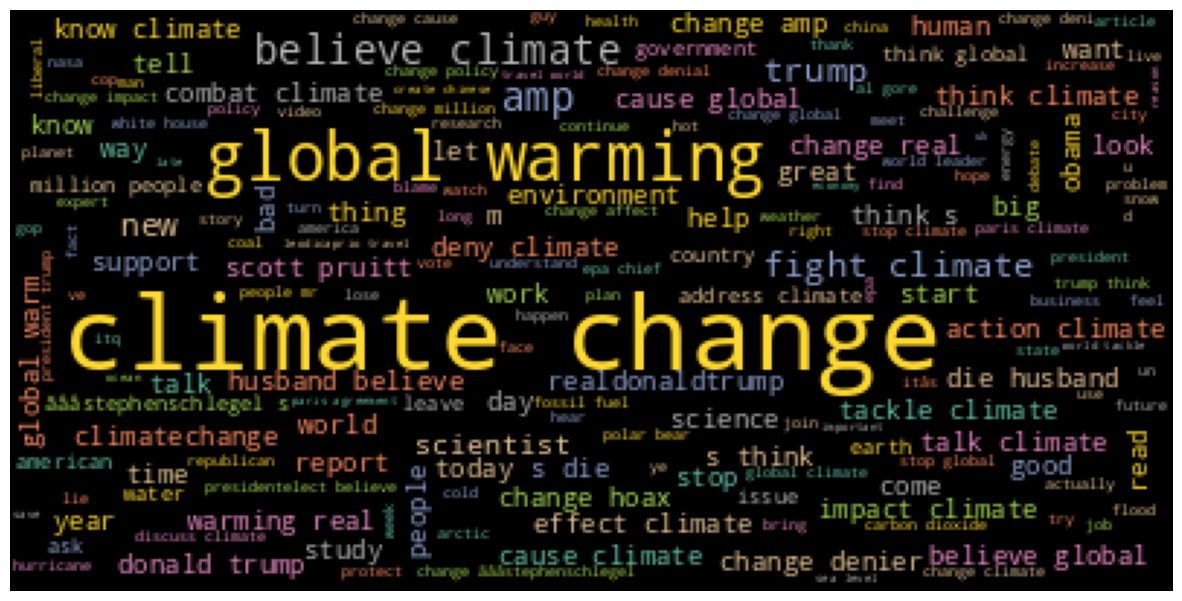

In [32]:
plt.figure(figsize = (15, 15), facecolor = None) 
wc=WordCloud(colormap='Set2').generate(final_text)
plt.imshow(wc)
plt.axis("off")
plt.show()

## Fancy wordcloud

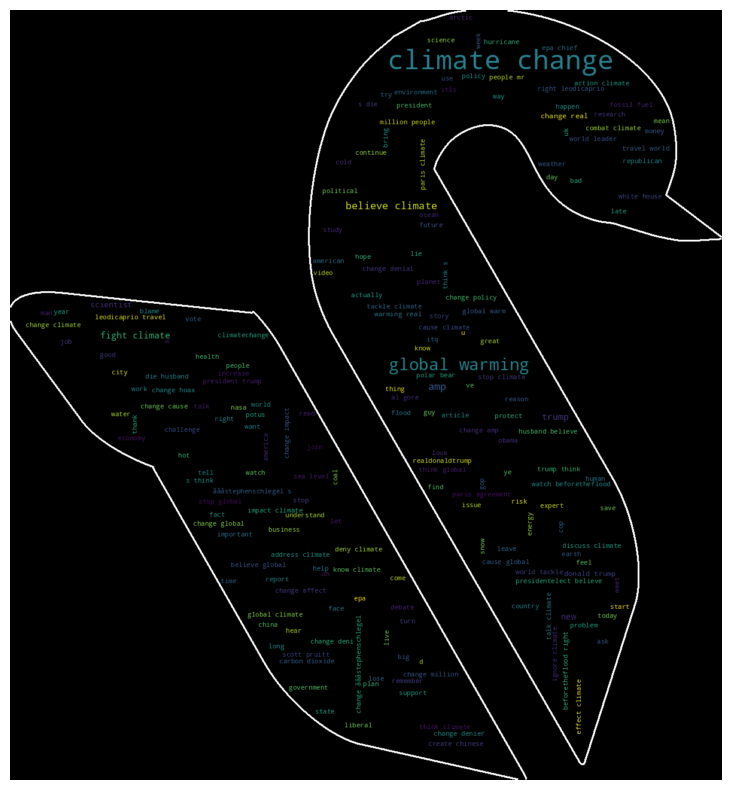

In [35]:
plt.figure(figsize = (10, 10))
wc=WordCloud(mask=BG_image, contour_color='white', contour_width=3).generate(final_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# A Single function for pre-processing

In [ ]:
def pre_processing(input_data, text_col):
  input_data["text_col_clean"]=input_data[text_col].apply(lambda x:str(x).lower())
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[expanded_form(t) for t in str(x).split()])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in x if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:clean_with_re(x))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:" ".join([t.lemma_ for t in spacy_model(str(x))if t.lemma_ !="-PRON-" ]))
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x:[t for t in str(x).split() if t not in spacy_stopwords ])
  input_data["text_col_clean"]=input_data["text_col_clean"].apply(lambda x: " ".join(x) )
  print(input_data[[text_col,"text_col_clean"]])

In [ ]:
pre_processing(input_data=twitter_data, text_col="raw_tweet")

# Document Term Matrix

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec1 = CountVectorizer(min_df= 5) #minimum word freq=5
dtm_v1 = pd.DataFrame(countvec1.fit_transform(twitter_data['Final_Cleaned_Tweet_tokens']).toarray(), columns=countvec1.get_feature_names(), index=None)
print(dtm_v1.shape)
dtm_v1
